# Capstone project- Assignment


*   Medical insurance price prediction
*   using a kaggle dataset



In [10]:
%cd /content/drive/MyDrive/softwaretech_capstone

/content/drive/MyDrive/softwaretech_capstone


In [11]:
!ls /content/drive/MyDrive/softwaretech_capstone

DataForML.pkl  Final_XGB_Model.pkl  Medical_insurance.csv


### This Project is based on the famous Medical Insurance Price Prediction
available from Kaggle repository (https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction?resource=download ).


*   It contains the details of 2772 people of various ages, bmi, smoking habits, number of children, gender, region and charges of their medical insurance respectively  .
*   My project task is to create a machine learning model which can predict the average price of medical insurance on the basis of age, number of children, region, bmi, gender.
* For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on (machine learning/AI algorithms, regression algorith for example)available from different Python packages, modules and classes.

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/content/drive/MyDrive/softwaretech_capstone/Medical_insurance.csv', encoding='latin')
print('Shape before duplicating values :',df.shape)
df=df.drop_duplicates()
print('shape after duplicates get removed:',df.shape)

Shape before duplicating values : (2772, 7)
shape after duplicates get removed: (1337, 7)


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
print(df.head(10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


# Key observations from the step 1 about data description


* This file contains 2772 customer details which help an insurance company to predict medical expenses for new customers.
* There are 7 attributes and they are outlined below:
* Age- Age of the customer.
* Sex- Gender of the customer.
* BMI- Body mass index of the customer.
* Children- if a customer has children.
* Smoker- If the customer smokes or not.
* Region- region where the customer resides.
* Charges-charges a customer pays for insurance.

# Step 2: Probelm State definition


*   Creating a prediction model to predict the average price of insurance paid by people on the basis of their age and smoking habits, number of children,sex,bmi.
*   Target variable:charges
Predictors:/ Features: Region, sex, age, bmi, children, smoker



 Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.
*   Based on the problem statement we need to create a supervised ML Regression model, as the target variable is continuous.



# Step 4:Converting the categorical variables into numeric using get_dummies


*   If charges variable's distribution is too skewed then the predictive modeling might will lead to poor results.
* Ideally Bell curve is desirable but slightly positive skew or negative skew is also fine.
* When performing Regression algorithm modelling and analysis, we need to make sure the histogram looks like a bell curve or slight skewed version of it.
* Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios from the data.



In [16]:
import pandas as pd
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['region'],dtype= int)

# Print the encoded DataFrame
print(df_encoded)

      age     sex     bmi  children smoker      charges  region_northeast  \
0      19  female  27.900         0    yes  16884.92400                 0   
1      18    male  33.770         1     no   1725.55230                 0   
2      28    male  33.000         3     no   4449.46200                 0   
3      33    male  22.705         0     no  21984.47061                 0   
4      32    male  28.880         0     no   3866.85520                 0   
...   ...     ...     ...       ...    ...          ...               ...   
1333   50    male  30.970         3     no  10600.54830                 0   
1334   18  female  31.920         0     no   2205.98080                 1   
1335   18  female  36.850         0     no   1629.83350                 0   
1336   21  female  25.800         0     no   2007.94500                 0   
1337   61  female  29.070         0    yes  29141.36030                 0   

      region_northwest  region_southeast  region_southwest  
0             

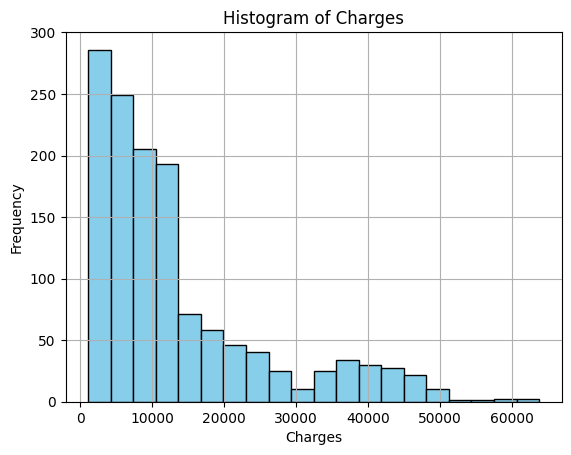

In [17]:
charges = df['charges']

# Plot the histogram
plt.hist(charges, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Charges')
plt.grid(True)
plt.show()


 #Observations from Step 4
* The data distribution of the target variable is right skewed hence we can  proceed further.
* There are sufficient number of rows for each type of values to learn from.

# Step 5: Basic Exploratory Data Analysis
* This step is performed to guage the overall data.
* The volume of data, the types of columns present in the data.
* Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

* This step helps to start the column/data rejection process.
* You must look at each column carefully and ask, does this column affect the values of the Target variable/Class?
* For example in this dataset, you will ask, does this column affect the price of the house?
* If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

* There are four commands which are used for Basic data exploratory Analysis in Python

* head() : This helps to see a few sample rows of the data
* info() : This provides the summarized information of the data
* describe() : This provides the descriptive statistical details of the data
* unique(): This helps us to identify if a column is categorical or continuous.


In [18]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df.tail()


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [21]:
# Looking at the descriptive statistics of the data
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


In [22]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## Observations from Step 5 - Basic Exploratory Data Analysis
* Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column.
* Hence, creating a initial roadmap for further analysis.

* The selected columns in this step are not final, further study will be done and then a final list will be created

* age-Continuous.Selected.
* sex-Categorical.Selected.  
* bmi-Continuous.Selected.
* children-Categorical.Selected.
* smoker-Categorical.Selected.
* region-Categorical.Selected.
*   charges-Continuous.Selected



 This is the Target or Class Variable, which needs to be predicted by the proposed regression model!

## Step 7: Removing Unwanted columns
* There are no qualitative columns in the data.
* Hence no need to remove any column.

# Step 8: Visual Exploratory Data Analysis
* Visualize distribution of all the Categorical Predictor variables in the data using bar plots
* We can spot a categorical variable in the data by looking at the unique values in them.
* Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.
* Based on the Basic Exploration Data Analysis in the previous step,  we have spotted 4 categorical variables

* Categorical Predictors:

* sex
* children
* smoker   
* region

 We will use bar charts to see how the data is distributed for these categorical columns.


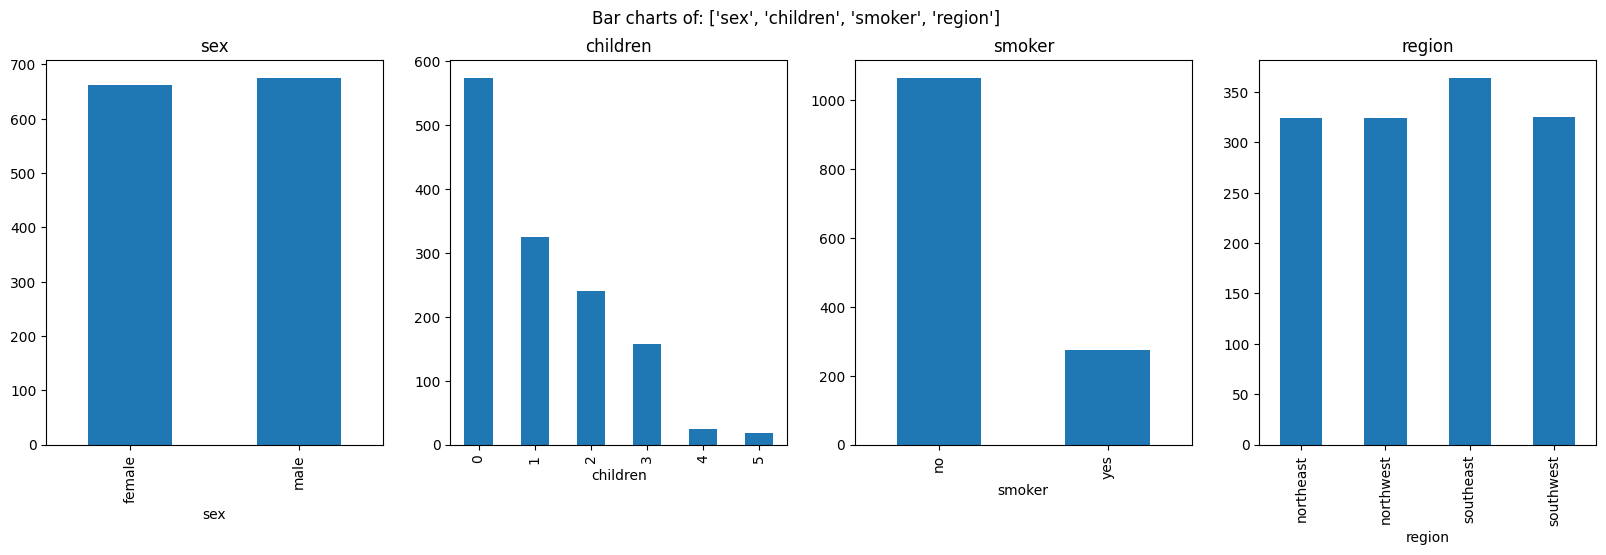

In [23]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])
        subPlot[plotNumber].set_title(colName)
PlotBarCharts(inpData=df, colsToPlot=['sex','children','smoker','region'])

# Observations from Step 8 - Visual Exploratory Data Analysis
* Bar Charts have allowed interpretation on the four data columns
* The bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.
* In the ideal bar chart each category has comparable frequency. * Hence, there are enough rows for each category in the data for the ML/AI regression algorithm to learn.
* If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers.
* These kind of columns may not be very helpful in machine learning model development.
* We can confirm this with the correlation analysis step coming up,  and take a final call to select or reject the column/data attribute.
* In this dataset, it is worth noting that "smoker" is skewed. * There is just one bar which is dominating and other one have very less rows.
* Such columns may not be correlated with the target variable because there is no information to learn.
* The algorithms cannot find any rule like when the value is this then the target variable is that.

* Whenever in doubt, always investigate the column further.


## Step 9: Now Visualize distribution of all the Continuous Predictor variables in the data using histograms
* Based on the Basic Exploratory Data Analysis, there are two continuous predictor variables:'age','bmi'

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>]],
      dtype=object)

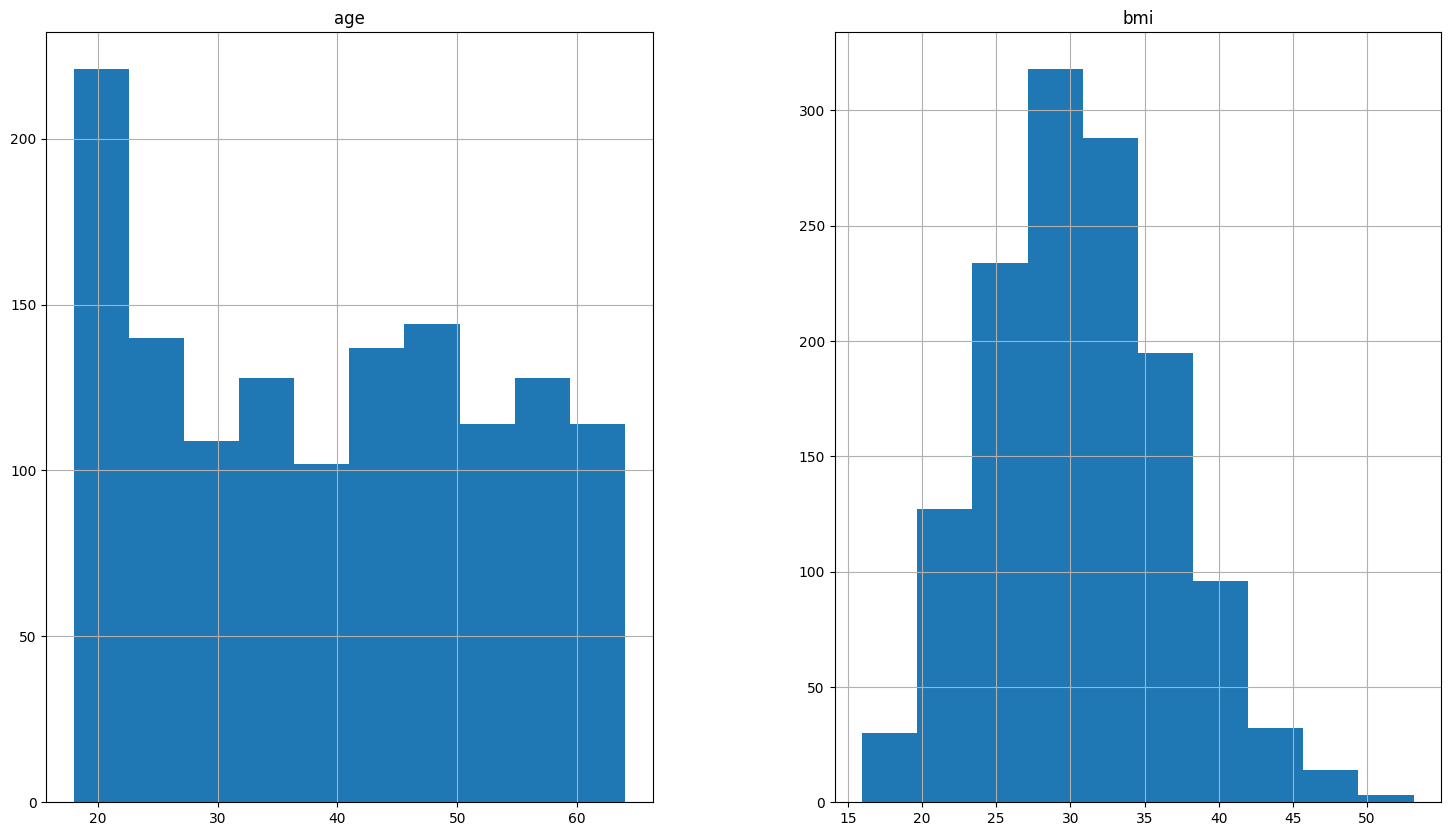

In [24]:
# Plotting histograms of multiple columns together
df.hist(['age','bmi'], figsize=(18,10))

## Observations from Step 9
* Histogram Interpretation
* Each histograms shows us the data distribution for a single continuous variable.

* The X-axis shows the range of values and Y-axis represent the number of values in that range.
* For example, in the above histogram of "age", there are around 1337 rows in data that has age value  between 18 and 64.

* The ideal outcome for histogram is a bell curve or slightly skewed bell curve.
* If there is too much skewness, then outlier removal treatment should be done and the column should be re-examined, and if that also does not solve the problem then only reject the column/data attribute.

* Selected Continuous Variables:

* age: Selected. The distribution is good.
*   bmi:Selected. Outliers seen beyond 45, need to treat them

## Step 10: Outlier Analysis
* Outliers are extreme values in the data which are far away from most of the values.
* You can see them as the tails in the histogram.

* Outlier must be treated one column/data attribute at a time.
* As the treatment will be slightly different for each column
* Why I should analyse the outliers?
* Outliers bias the building of machine learning models.
* As the algorithm tries to fit the extreme value, it goes away from majority of the data.
* Outlined below are two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value
* Let us find out out the most logical value to be replaced in place of outliers by looking at the histogram.


## Step 10: Outlier Analysis
* Outliers are extreme values in the data which are far away from most of the values.
* You can see them as the tails in the histogram.

* Outlier must be treated one column/data attribute at a time.
* As the treatment will be slightly different for each column
* Why I should analyse the outliers?
* Outliers bias the building of machine learning models.
* As the algorithm tries to fit the extreme value, it goes away from majority of the data.
* Outlined below are two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value
* Let us find out out the most logical value to be replaced in place of outliers by looking at the histogram.


In [25]:
#Replacing outliers for 'bmi'
# Finding nearest values to 55 mark
df['bmi'][df['bmi']<55].sort_values(ascending=False)

1317    53.130
1047    52.580
847     50.380
116     49.060
286     48.070
         ...  
1286    17.290
412     17.195
1226    16.815
428     16.815
172     15.960
Name: bmi, Length: 1337, dtype: float64

Observation: Above result shows the nearest logical value is 53.13, hence, replacing any value above 55 with it.

In [26]:
# Replacing outliers with nearest possibe value
df['bmi'][df['bmi']>55] =51.13

# Step 11:Visualising Data Distribution after outlier removal


array([[<Axes: title={'center': 'bmi'}>]], dtype=object)

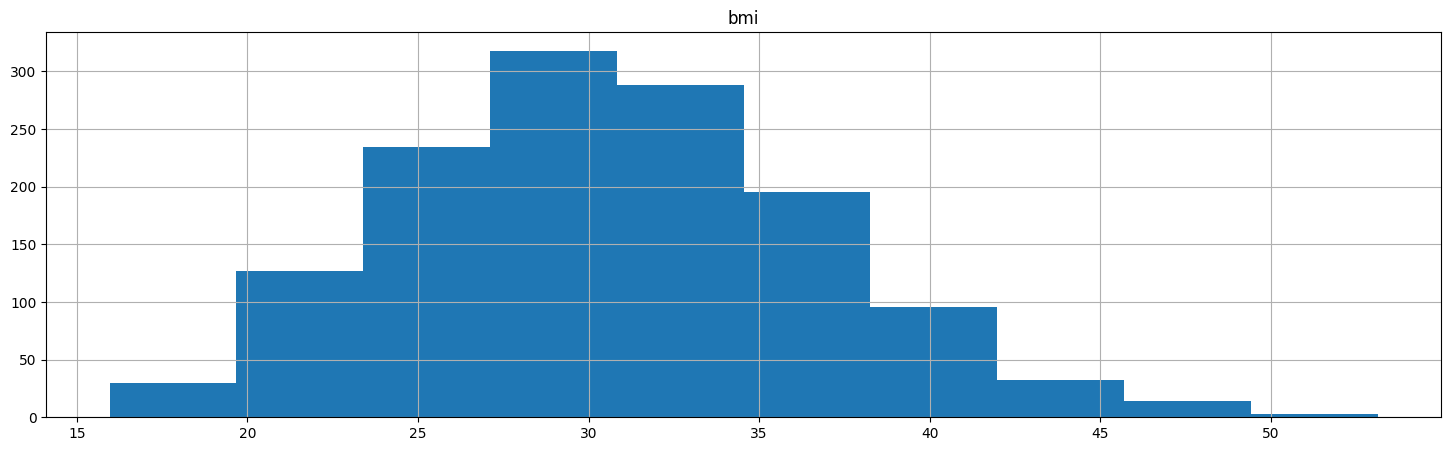

In [27]:
df.hist(['bmi'], figsize=(18,5))

## Observation from Step 11
* The distribution has improved after the outlier treatment.
* There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

# Step 12: Missing Values Analysis

* Missing values are treated for each column separately.
* If a column has more than 30% data missing, then missing value treatment cannot be done.
* That column must be rejected because too much information is missing.
* Outlined below are some options for treating missing values in data.
* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values.
* Interpolate the values based on business logic.

In [28]:
# Finding how many missing values are there for each column
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#Observations from Step 12: Missing Value Analysis
* No missing values in this data!
* So no removal of any data samples(rows) is needed.


## Step 13: Feature Selection (Attribute Selection)

* Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
* This can be done directly by measuring the correlation values or ANOVA analysis or Chi-Square tests.
* However, it is always helpful to visualize the relation between the Target variable/class variable and each of the predictors(features) to get a better sense of data.

* Listed below are some of the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

* **Visual exploration of relationship between variables**
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots
* Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

* **For this dataset, the Target variable is Continuous, hence following two scenarios will need attention**

* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

## Relationship exploration: Continuous Vs Continuous -- Scatter Charts
* When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using a metric called pearson's correlation value.

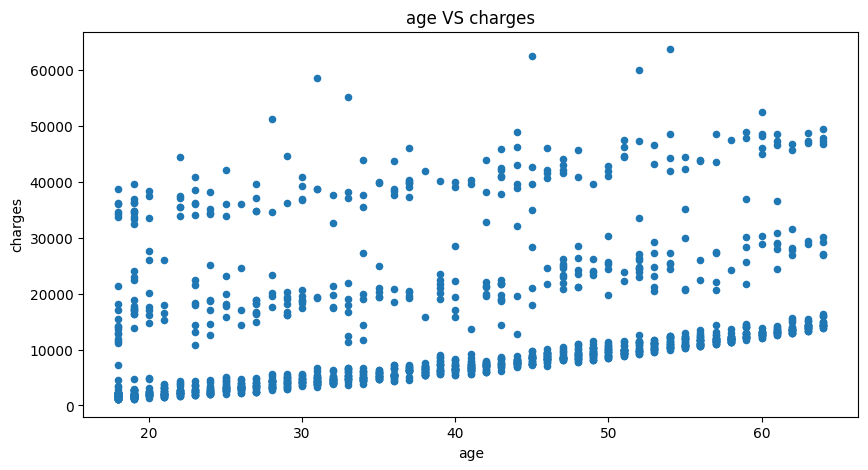

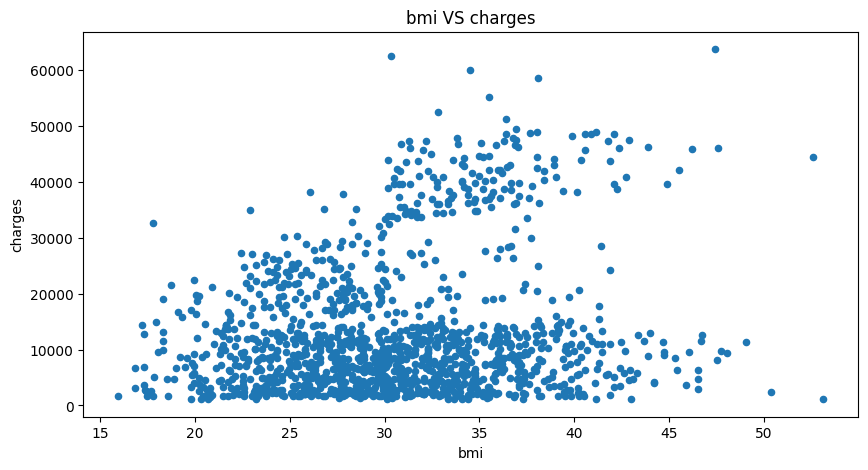

In [29]:
ContinuousCols=['age','bmi']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='charges', figsize=(10,5), title=predictor+" VS "+ 'charges')

## Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

* Pearson's correlation coefficient is a powerful metric for doing this.
* It can simply be calculated as the covariance between two features  x and  y
  (numerator) divided by the product of their standard deviations (denominator):


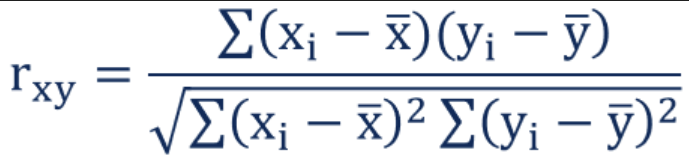
 This value can be calculated only between two numeric columns
*   Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question.

## Observations from Step 14
* Final selected Continuous columns:

* **'age'**

# Step 15:  Relationship exploration: Categorical Vs Continuous -- Box Plots
* When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots,  and
* Measure the strength of relation using Anova test.

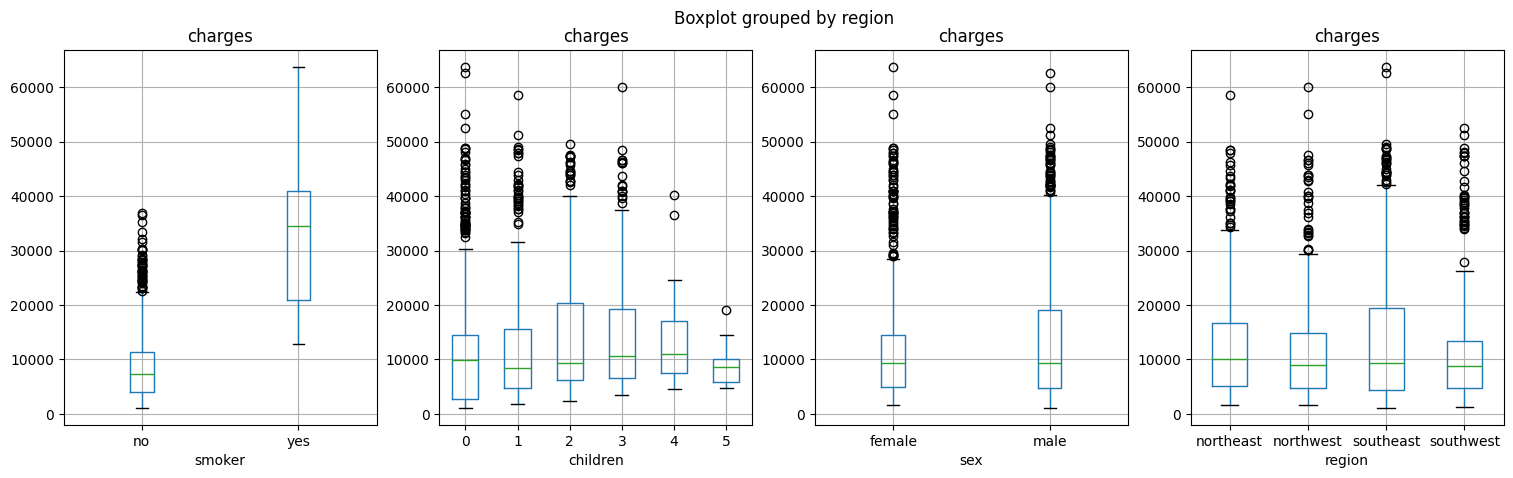

In [30]:
# Box plots for continuous Target Variable "charges" and Categorical predictors
CategoricalColsList=['smoker','children','sex','region']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    df.boxplot(column='charges', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

#Observations from Step 15: Box-Plots interpretation

* What should you look for in these box plots?

* These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

* If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

* On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with charges.

* For this datadata, both the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

## Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

* Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0) Null Hypothesis: There is NO relation between the given variables (i.e.
* The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 (Null Hypothesis being true)

In [31]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [32]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['smoker', 'region','sex','children']
FunctionAnova(inpData=df,
              TargetVariable='charges',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

smoker is correlated with charges | P-Value: 1.4067220949358597e-282
region is correlated with charges | P-Value: 0.03276288025444947
sex is correlated with charges | P-Value: 0.033820791995078286
children is correlated with charges | P-Value: 0.006133448188169501


['smoker', 'region', 'sex', 'children']

##Observations from Step 16
* The results of ANOVA confirm our visual analysis using box plots above.

* All categorical variables are correlated with the Target variable.
* This is something you can guess by looking at the box plots!

* Final selected Categorical columns:

'smoker','sex','region'

## Selecting final Predictors/Features for building Machine Learning/AI model.
* Based on the extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning model building as:
* 'smoker','sex','region','age'

In [33]:
SelectedColumns=['age','sex','smoker','region']

# Selecting final columns
DataForML=df[SelectedColumns]
DataForML.head()

,age,sex,smoker,region
0,19,female,yes,southwest
1,18,male,no,southeast
2,28,male,no,southeast
3,33,male,no,northwest
4,32,male,no,northwest


In [34]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Step 17: Data Pre-processing for Machine Learning Model Building or Model Development
* List of steps that needs to be performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks
* Converting the ordinal variable to numeric - In this data there is no Ordinal categorical variable.
* Converting the binary nominal variable to numeric using 1/0 mapping: There is no binary nominal variable in string format in this data


## Converting the nominal variable to numeric using get_dummies()

In [35]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML,dtype=int)

# Adding Target Variable to the data
DataForML_Numeric['charges']=df['charges']

# Printing sample rows
DataForML_Numeric.head()

,age,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,1,0,0,1,0,0,0,1,16884.92400
1,18,0,1,1,0,0,0,1,0,1725.55230
2,28,0,1,1,0,0,0,1,0,4449.46200
3,33,0,1,1,0,0,1,0,0,21984.47061
4,32,0,1,1,0,0,1,0,0,3866.85520


## Step 18: Machine Learning Model Development:
* Splitting the data into Training and Testing sample
* We dont use the full data for creating the model (training data).
* Some data is randomly selected and kept aside for checking how good the model is.
* This is known as Testing Data and the remaining data is called Training data on which the model is built.
* Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [36]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['age', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'charges'],
      dtype='object')

In [37]:
#Separate Target Variable and Predictor Variables
TargetVariable='charges'
Predictors=['age', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Step 19: Standardization/Normalization of data
* You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data (Optional Step)

* However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [38]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(935, 9)
(935,)
(402, 9)
(402,)


## Step 20: Multiple Linear Regression Algorithm For ML/AI model building

In [40]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
 #Running 10-fold cross-validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.7074505368409092

##### Model Validation and Accuracy Calculations ##########
        age  sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0  0.673913         0.0       1.0        1.0         0.0               1.0   
1  0.239130         1.0       0.0        1.0         0.0               0.0   
2  0.717391         1.0       0.0        1.0         0.0               0.0   
3  0.282609         0.0       1.0        0.0         1.0               0.0   
4  0.282609         0.0       1.0        1.0         0.0               0.0   

   region_northwest  region_southeast  region_southwest      charges  \
0               0.0               0.0               0.0   8688.85885   
1               0.0               0.0               1.0   5708.86700   
2               1.0               0.0               0.0  11436.73815   
3               1.0               0.0               0.0  38746.35510   
4               0.0               1.0               0.0   4463

# Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.7433666855219843

##### Model Validation and Accuracy Calculations ##########
        age  sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0  0.673913         0.0       1.0        1.0         0.0               1.0   
1  0.239130         1.0       0.0        1.0         0.0               0.0   
2  0.717391         1.0       0.0        1.0         0.0               0.0   
3  0.282609         0.0       1.0        0.0         1.0               0.0   
4  0.282609         0.0       1.0        1.0         0.0               0.0   

   region_northwest  region_southeast  region_southwest      charges  \
0               0.0               0.0               0.0   8688.85885   
1               0.0               0.0               1.0   5708.86700   
2               1.0               0.0               0.0  11436.73815   
3               1.0               0.0               0.0  38746.35510   
4               0.0 

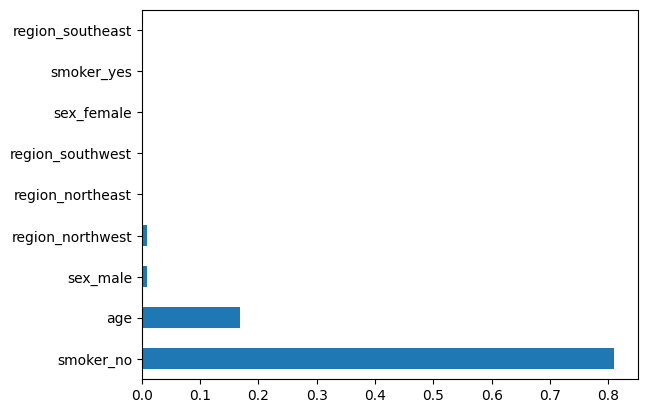

In [41]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting/Visualising the Decision Tree

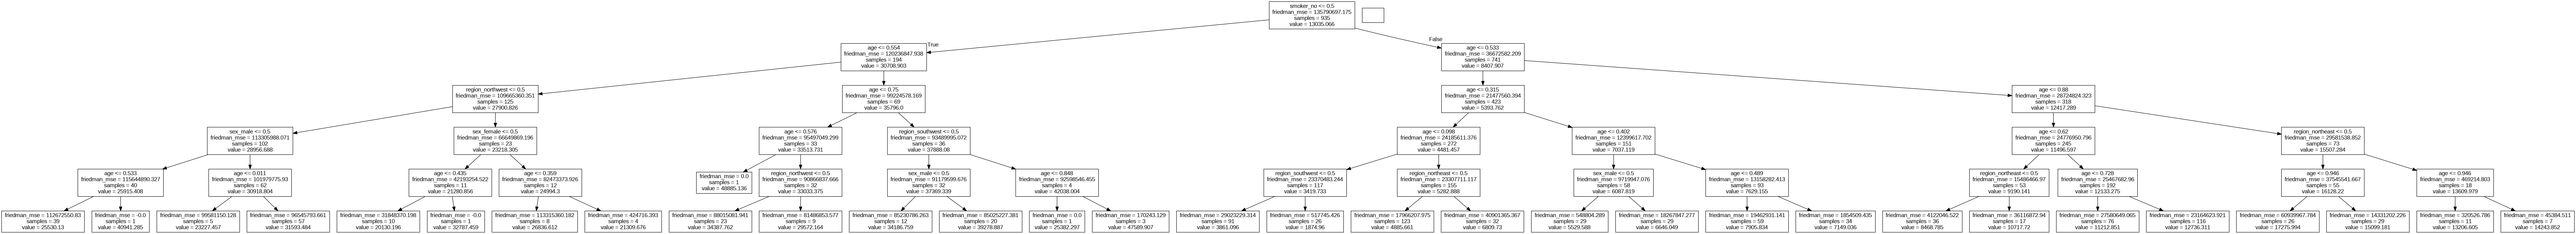

In [42]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.7412267791520342

##### Model Validation and Accuracy Calculations ##########
        age  sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0  0.673913         0.0       1.0        1.0         0.0               1.0   
1  0.239130         1.0       0.0        1.0         0.0               0.0   
2  0.717391         1.0       0.0        1.0         0.0               0.0   
3  0.282609         0.0       1.0        0.0         1.0               0.0   
4  0.282609         0.0       1.0        1.0         0.0               0.0   

   region_northwest  region_southeast  region_southwest      charges  \
0               0.0               0.0               0.0   8688.85885   
1               0.0               0.0               1.0   5708.86700   
2               1.0               0.0               0.0  11436.73815   
3               1.0               0.0               0.0  38746.35510   
4 

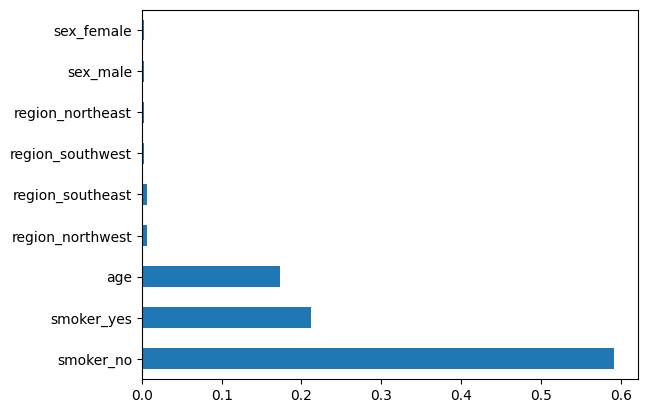

In [43]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting One of the Decision Tree in Random Forest Regressor

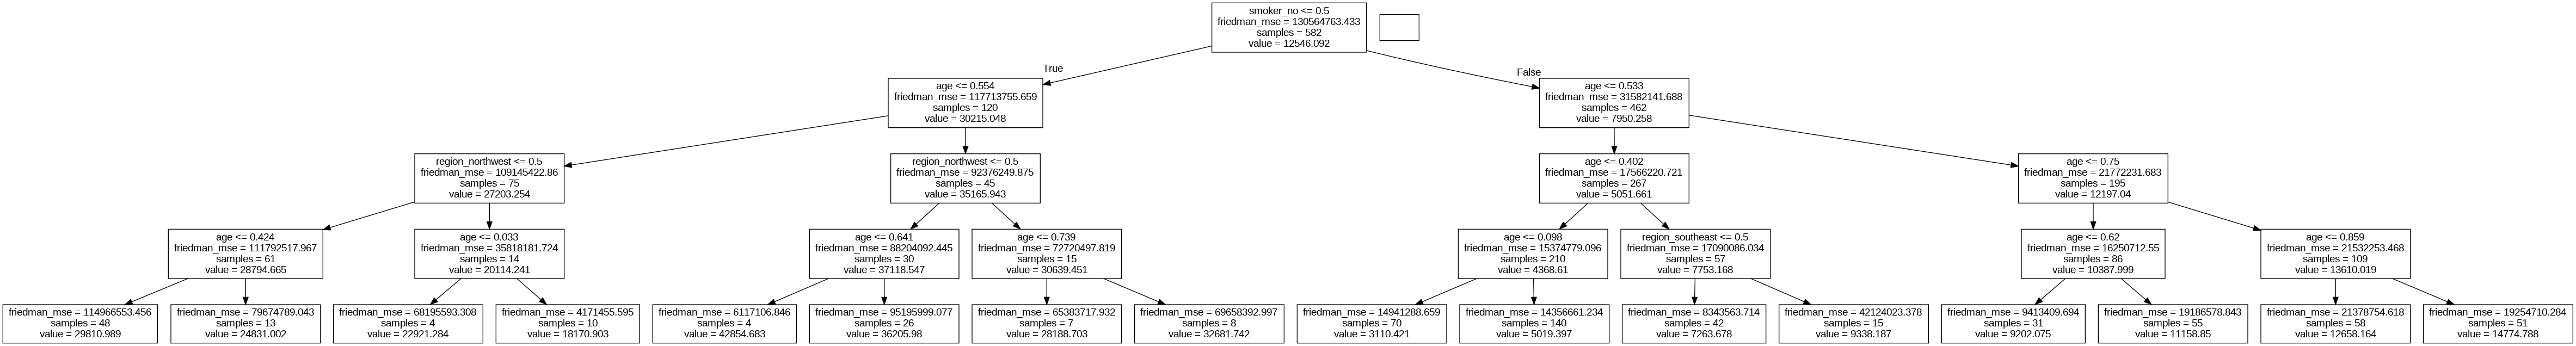

In [44]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

## Step 21: AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.7058097285639227

##### Model Validation and Accuracy Calculations ##########
        age  sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0  0.673913         0.0       1.0        1.0         0.0               1.0   
1  0.239130         1.0       0.0        1.0         0.0               0.0   
2  0.717391         1.0       0.0        1.0         0.0               0.0   
3  0.282609         0.0       1.0        0.0         1.0               0.0   
4  0.282609         0.0       1.0        1.0         0.0               0.0   

   region_northwest  region_southeast  region_southwest      charges  \
0               0.0               0.0               0.0   8688.85885   
1               0.0               0.0               1.0   5708.86700   
2               1.0               0.0               0.0  11436.73815   
3               1.0         

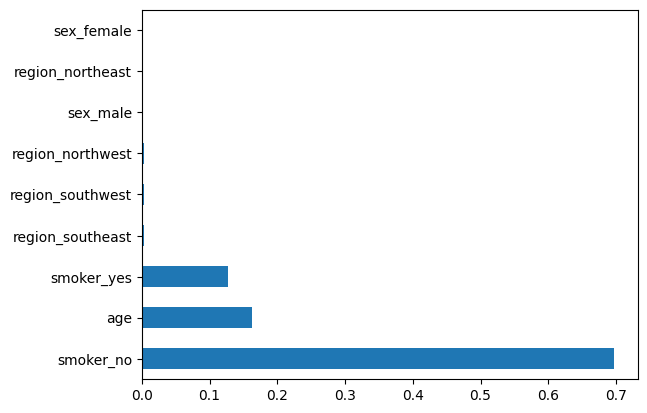

In [45]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
    # Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.7501637043315775

##### Model Validation and Accuracy Calculations ##########
        age  sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0  0.673913         0.0       1.0        1.0         0.0               1.0   
1 

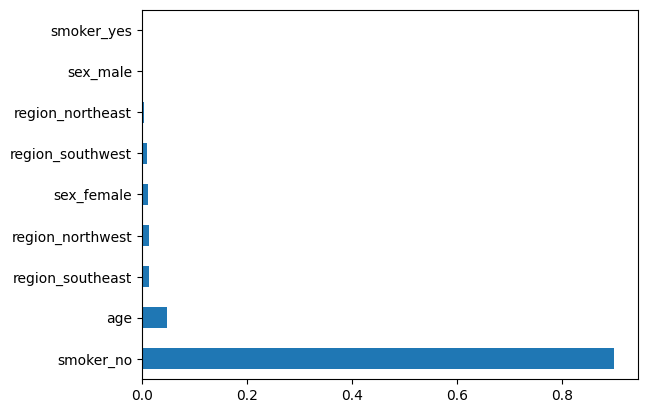

In [46]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Plotting a single Decision tree out of XGBoost

<Axes: >

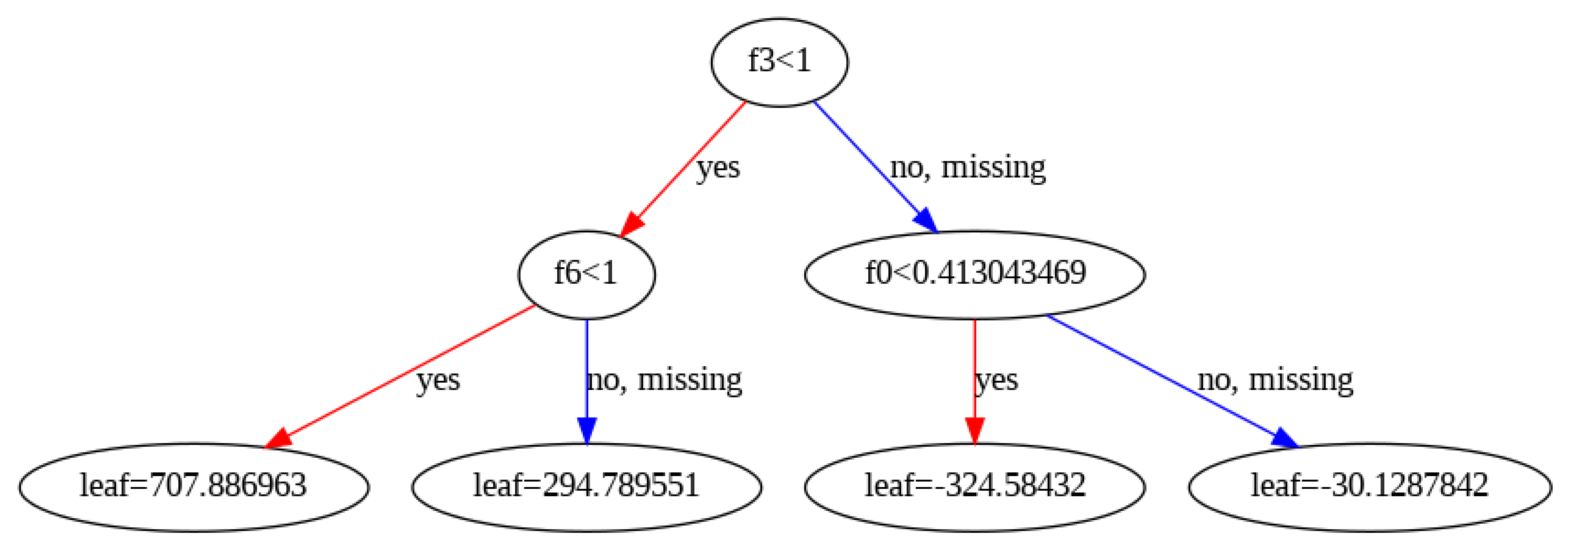

In [47]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# K-Nearest Neighbor(KNN)

In [48]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.7954900431858613

##### Model Validation and Accuracy Calculations ##########
        age  sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0  0.673913         0.0       1.0        1.0         0.0               1.0   
1  0.239130         1.0       0.0        1.0         0.0               0.0   
2  0.717391         1.0       0.0        1.0         0.0               0.0   
3  0.282609         0.0       1.0        0.0         1.0               0.0   
4  0.282609         0.0       1.0        1.0         0.0               0.0   

   region_northwest  region_southeast  region_southwest      charges  \
0               0.0               0.0               0.0   8688.85885   
1               0.0               0.0               1.0   5708.86700   
2               1.0               0.0               0.0  11436.73815   
3               1.0               0.0               0.0  38746.35510   
4               0.0               1.0         

# Support Vector Machine (SVM) Regressor

In [49]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


SVR(C=50, gamma=0.01)
R2 Value: -0.07991627546418334

##### Model Validation and Accuracy Calculations ##########
        age  sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0  0.673913         0.0       1.0        1.0         0.0               1.0   
1  0.239130         1.0       0.0        1.0         0.0               0.0   
2  0.717391         1.0       0.0        1.0         0.0               0.0   
3  0.282609         0.0       1.0        0.0         1.0               0.0   
4  0.282609         0.0       1.0        1.0         0.0               0.0   

   region_northwest  region_southeast  region_southwest      charges  \
0               0.0               0.0               0.0   8688.85885   
1               0.0               0.0               1.0   5708.86700   
2               1.0               0.0               0.0  11436.73815   
3               1.0               0.0               0.0  38746.35510   
4               0.0               1.0               0.0  

# Step 21: Model Deployment
* Deployment of the Model - Based on the above trials we select that algorithm which produces the best average accuracy.

* In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

* I am choosing XG Boost Regression as the final model it has the highest accuracy!

* In order to deploy the model we follow steps outlined next.

* Train/Build the model again using 100% data available

* Save the model as a serialized file which can be stored anywhere.

* Create a python function which gets integrated with front-end Viewer(GUI/ Website etc.) to take all the inputs and returns the prediction

* Choosing only the most important variables

* Its beneficial to keep lesser number of predictors for the model while deploying it in production.

* The lesser predictors you keep, the better it is, because the model will be less dependent on predictor columns/features, hence, more stable.

* This is important specially when the data is high dimensional(too many predictor columns/features).

* For this dataset, the most important predictor variables are 'age,'sex','bmi','number of children','smoker','region' As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables will result in better medical insurance price prediction platform/system.

In [50]:
# Separate Target Variable and Predictor Variables
TargetVariable='charges'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['age', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1337, 9)
(1337,)


# Cross validating the final model accuracy with less predictors

In [51]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [55.9272367  60.22214905 61.85280106 59.63224689 60.72925257 59.04167152
 60.20399798 60.86774368 64.40891097 61.48391237]

Final Average Accuracy of the model: 60.44


# Step 22: Retraining the final model using 100% data

In [52]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

# Step 23: Save the model as a serialized file which can be stored anywhere

In [53]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/softwaretech_capstone


In [54]:
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['age', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Assuming that 'PredictorScaler' is your predefined standard scaler
    X = PredictorScalerFit.transform(X)

    # Load your trained model - replace 'YourModel.pkl' with the name of your model file
    RegModel = joblib.load('Final_XGB_Model.pkl')

    # Generate predictions
    predictions = RegModel.predict(X)

    return predictions


In [55]:
# Import necessary libraries
!pip install joblib
import pandas as pd
import joblib

# This Function can be called from any front end tool/website
def FunctionPredictResult(InputData):
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['age', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Assuming that 'PredictorScaler' is your predefined standard scaler
    X = PredictorScalerFit.transform(X)

    # Load your trained model - replace 'YourModel.pkl' with the name of your model file
    RegModel = joblib.load('Final_XGB_Model.pkl')

    # Generate predictions
    predictions = RegModel.predict(X)

    return predictions

# Your new sample data
NewSampleData=pd.DataFrame(data=[[19, 'female', 27.9, 0, 'yes', 'southwest'],
                                 [18, 'male', 33.77, 1, 'no', 'southeast']],
                           columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)


   age     sex    bmi  children smoker     region
0   19  female  27.90         0    yes  southwest
1   18    male  33.77         1     no  southeast


array([24640.275 ,  3064.4033], dtype=float32)

In [56]:
import json  # Import the json module

def FunctionGeneratePrediction(inp_age, inp_sex, inp_bmi, inp_children, inp_smoker, inp_region):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_age, inp_sex, inp_bmi, inp_children, inp_smoker, inp_region]],
     columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Convert the numpy array to a list
    Predictions = Predictions.tolist()

    # Convert the list to JSON
    Predictions_JSON = json.dumps(Predictions)

    # Returning the predictions
    return Predictions_JSON


In [57]:
import json  # Import the json module

def FunctionGeneratePrediction(inp_age, inp_sex, inp_bmi, inp_children, inp_smoker, inp_region):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_age, inp_sex, inp_bmi, inp_children, inp_smoker, inp_region]],
     columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Convert the numpy array to a list
    Predictions = Predictions.tolist()

    # Convert the list to JSON
    Predictions_JSON = json.dumps(Predictions)

    # Returning the predictions
    return Predictions_JSON

# Function call
FunctionGeneratePrediction(inp_age=19, inp_sex='female', inp_bmi=27.9, inp_children=0, inp_smoker='yes', inp_region='southwest')


'[24640.275390625]'

In [58]:
!pip install flask

In [59]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [60]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the parameters from API call
        age_value = int(request.args.get('age'))
        sex_value = request.args.get('sex')
        bmi_value = float(request.args.get('bmi'))
        children_value = int(request.args.get('children'))
        smoker_value = request.args.get('smoker')
        region_value = request.args.get('region')

        # Calling the function to get predictions
        prediction_from_api = FunctionGeneratePrediction(
            inp_age=age_value,
            inp_sex=sex_value,
            inp_bmi=bmi_value,
            inp_children=children_value,
            inp_smoker=smoker_value,
            inp_region=region_value
        )

        return prediction_from_api

    except Exception as e:
        return 'Something is not right!:' + str(e)


In [ ]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit
